# ***Import***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import time
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("heart4.csv")

In [ ]:
df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,40,1.0,0.0,0,0,0,196.0,107.0,71.0,27.97,81.0,78.0,0
1,0,47,1.0,0.0,0,0,0,251.0,122.0,82.0,29.73,96.0,77.0,0
2,1,49,21.0,0.0,0,0,0,246.0,128.5,81.0,26.34,76.0,71.0,0
3,0,62,31.0,0.0,0,1,0,226.0,151.0,96.0,29.58,66.0,79.0,1
4,0,47,24.0,0.0,0,0,0,286.0,131.0,85.0,24.10,86.0,86.0,0


In [ ]:
X = df.drop(['TenYearCHD'],axis=1)
y = df['TenYearCHD']

# ***Spliting the Data***

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

# ***Cross validation***
K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model=RandomForestClassifier()
from sklearn import tree
kfold_validation=KFold(n_splits=10, random_state = 42, shuffle=True)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.97357441 0.98052851 0.98470097 0.97635605 0.98331015 0.97635605
 0.98052851 0.97913769 0.98050139 0.98050139]
0.9795495136002106


# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

pred_prob1 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
 
#AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1) 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.9564209550301345
 AUC Score: 0.9931531523785777
[[ 991   79]
 [  15 1072]]


              precision    recall  f1-score   support

           0       0.99      0.93      0.95      1070
           1       0.93      0.99      0.96      1087

    accuracy                           0.96      2157
   macro avg       0.96      0.96      0.96      2157
weighted avg       0.96      0.96      0.96      2157



# ***Logistics Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

start = time.time()

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, precision_score
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
pred_prob2 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
 
#AUC scores
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1) 

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
end = time.time()
diff = end - start
print('Execution time:', diff)

 AUC Score: 0.9931531523785777

Accuracy for training set for Logistic Regression = 0.661498708010336
Accuracy for test set for Logistic Regression = 0.6629578117756143
[[727 343]
 [384 703]]


              precision    recall  f1-score   support

           0       0.65      0.68      0.67      1070
           1       0.67      0.65      0.66      1087

    accuracy                           0.66      2157
   macro avg       0.66      0.66      0.66      2157
weighted avg       0.66      0.66      0.66      2157

Execution time: 0.02909255027770996


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ***Support Vector Machine***
**SVM**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

print('Accuracy for training set for SVM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
pred_prob3 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
 
#AUC scores
auc_score3 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1) 

Accuracy for training set for SVM = 0.661498708010336
Accuracy for test set for SVM = 0.6629578117756143
[[722 348]
 [340 747]]


              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1070
           1       0.68      0.69      0.68      1087

    accuracy                           0.68      2157
   macro avg       0.68      0.68      0.68      2157
weighted avg       0.68      0.68      0.68      2157

 AUC Score: 0.9931531523785777


**Kernal SVM**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
pred_prob4 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
 
#AUC scores
auc_score4 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1) 

[[828 242]
 [515 572]]


              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1070
           1       0.70      0.53      0.60      1087

    accuracy                           0.65      2157
   macro avg       0.66      0.65      0.64      2157
weighted avg       0.66      0.65      0.64      2157

 AUC Score: 0.9931531523785777


# ***LightGBM***

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:
       y_pred[i]=0

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

cm_train = confusion_matrix(y_pred_train, y_train)
print(confusion_matrix(y_test, y_pred))
pred_prob5 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
 
#AUC scores
auc_score5 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1) 
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(classification_report(y_test, y_pred))

[[872 198]
 [100 987]]
 AUC Score: 0.9931531523785777

Accuracy for training set for LightGBM = 0.9493142516398331
Accuracy for test set for LightGBM = 0.8618451553082985
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1070
           1       0.83      0.91      0.87      1087

    accuracy                           0.86      2157
   macro avg       0.87      0.86      0.86      2157
weighted avg       0.86      0.86      0.86      2157



# ***ROC***

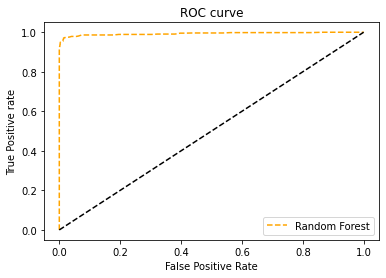

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
#Plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
#title
plt.title('ROC curve')
#x-label
plt.xlabel('False Positive Rate')
#y-label
plt.ylabel('True Positive rate')
 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

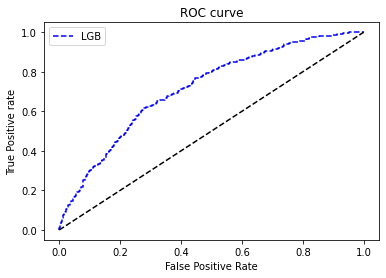

In [ ]:
from sklearn.metrics import roc_curve


fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
#Plot roc curves
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LR')
# plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
# plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='KSVM')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='LGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
#title
plt.title('ROC curve')
#x-label
plt.xlabel('False Positive Rate')
#y-label
plt.ylabel('True Positive rate')
 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();